In [1]:
#from model_phantom_noise import *
from model_phantom_DB import *
from linares_plot import * 
import itertools


%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


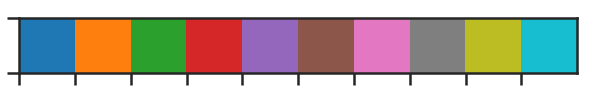

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    #plt.gca().set_xticks([])
    plt.gca().set_xticks([0,an[4].shape[1]/2, an[4].shape[1]])
    plt.gca().set_xticklabels(['0', str(an[4].shape[1]), str(an[4].shape[1]*2)], rotation=0)
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time (ms)');

## Examples

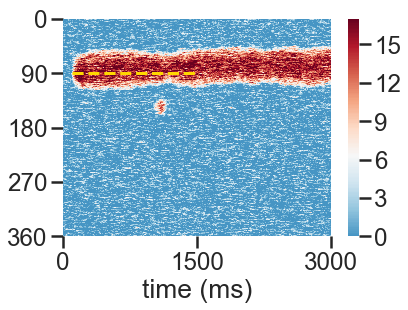

In [53]:
# fee=0.98
# fei=0.78
# fie=1.15
# fii=0.89

fee=1
fei=1
fie=1
fii=1


on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.5,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)
plt.show()


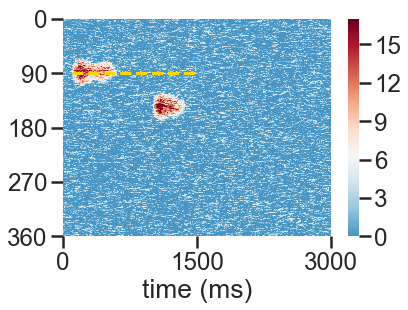

In [61]:
on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.5,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)


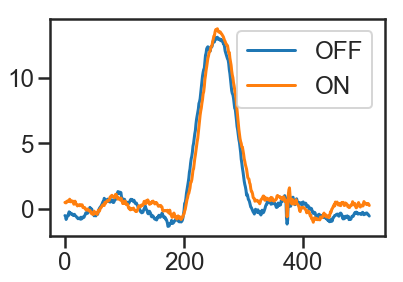

In [127]:
N=512
PA_off = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


PA_on = pd.DataFrame(on3[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)

plt.plot(PA_off_rolled, label='OFF')
plt.plot(PA_on_rolled, label='ON')
plt.legend()

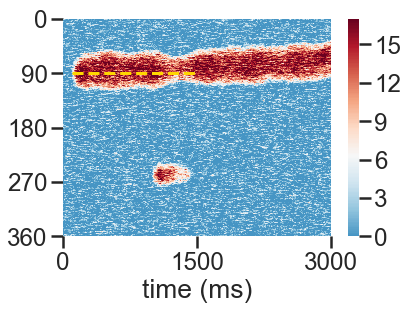

In [132]:
on3= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.5,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on3)
plt.show()


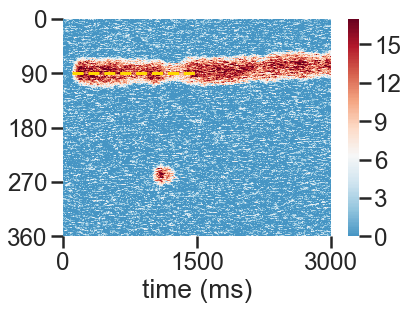

In [152]:
on2= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.5,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
plt.show()

In [412]:
on_rolled=[]

for n in range(10):
    on2= model(totalTime= 1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=1.2, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.5,              
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_on == max(PA_on)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_on_rolled = np.roll(PA_on, to_roll)
    on_rolled.append(PA_on_rolled)
    

In [413]:
on_rolled_mean=np.mean(on_rolled, axis=0)

In [414]:
off_rolled=[]

for n in range(10):
    off2= model(totalTime= 1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,  k_noise=0.5,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_off = pd.DataFrame(off2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_off == max(PA_off)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_off_rolled = np.roll(PA_off, to_roll)
    off_rolled.append(PA_off_rolled)

In [415]:
off_rolled_mean=np.mean(off_rolled, axis=0)

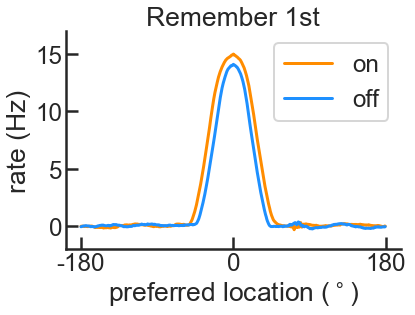

In [416]:
plt.plot(on_rolled_mean, color=c_on,  label='on' )
plt.plot(off_rolled_mean, color= c_off, label='off' )
plt.legend()
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,N/2, N])
plt.gca().set_xticklabels(['-180', '0', '180'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('preferred location ($^\circ$)');
plt.ylim(-2,17);

## R2

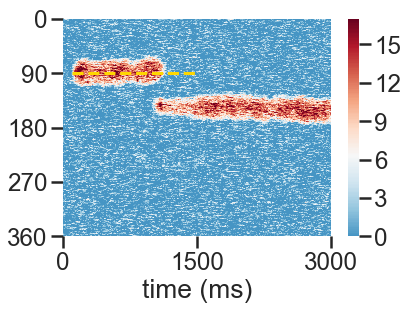

In [54]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.5,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)


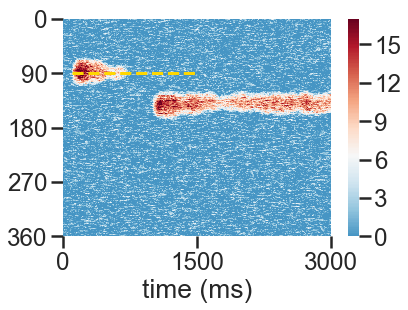

In [176]:

fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,              
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)

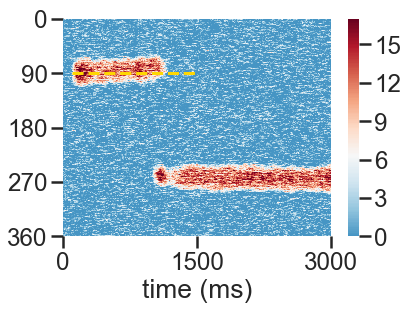

In [171]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.5,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)

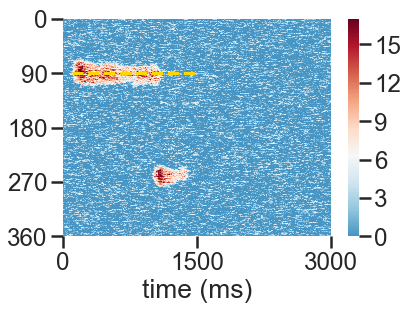

In [57]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on4= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.5,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on4)

In [64]:
on_rolled_2=[]

for n in range(10):
    fee=0.94
    fei=0.92
    fie=1.14
    fii=1.08
    on2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.5,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_on == max(PA_on)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_on_rolled = np.roll(PA_on, to_roll)
    on_rolled_2.append(PA_on_rolled)

In [65]:
on_rolled2_mean=np.mean(on_rolled_2, axis=0)

In [66]:
off_rolled_2=[]

for n in range(10):
    fee=0.94
    fei=0.92
    fie=1.14
    fii=1.08
    off2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.5,              
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_off = pd.DataFrame(off2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_off == max(PA_off)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_off_rolled = np.roll(PA_off, to_roll)
    off_rolled_2.append(PA_off_rolled)

In [67]:
off_rolled2_mean=np.mean(off_rolled_2, axis=0)

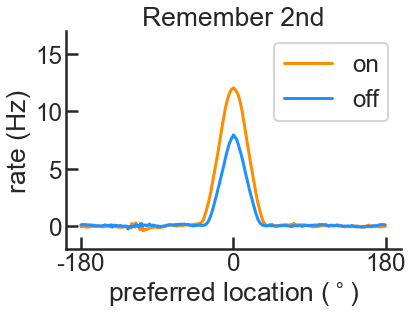

In [72]:
plt.plot(on_rolled2_mean, color=c_on,  label='on' )
plt.plot(off_rolled2_mean, color= c_off, label='off' )
plt.legend()
plt.title('Remember 2nd')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,N/2, N])
plt.gca().set_xticklabels(['-180', '0', '180'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('preferred location ($^\circ$)');
#r'abs error ($^\circ$)'
plt.ylim(-2,17);

## Simulations

In [143]:
### The best ones
err1_on_f = pd.read_excel('err1_on_f7.xlsx')
err1_off_f = pd.read_excel('err1_off_f7.xlsx')

err1_on_c = pd.read_excel('err1_on_c6.xlsx')
err1_off_c = pd.read_excel('err1_off_c6.xlsx')



err2_on_f = pd.read_excel('err2_on_f6.xlsx')
err2_off_f = pd.read_excel('err2_off_f6.xlsx')

err2_on_c = pd.read_excel('err2_on_c6.xlsx')
err2_off_c = pd.read_excel('err2_off_c6.xlsx')

In [151]:
## The second best (real diff for far, lowe I0E, noise, phnatom to work)
err1_on_f = pd.read_excel('err1_on_f34.xlsx')
err1_off_f = pd.read_excel('err1_off_f34.xlsx') ## 18, 19, 20, 21, 22 not working 32 yes 33 no! need to redo :S

err1_on_c = pd.read_excel('err1_on_c18.xlsx')
err1_off_c = pd.read_excel('err1_off_c18.xlsx')



err2_on_f = pd.read_excel('err2_on_f16.xlsx')
err2_off_f = pd.read_excel('err2_off_f16.xlsx')

err2_on_c = pd.read_excel('err2_on_c16.xlsx')
err2_off_c = pd.read_excel('err2_off_c16.xlsx')

In [188]:
## The second best (real diff for far, lowe I0E, noise, phnatom to work)
err1_on_f = pd.read_excel('err1_on_f36.xlsx')
err1_off_f = pd.read_excel('err1_off_f36.xlsx') ## 18, 19, 20, 21, 22 not working 32 yes 33 no! need to redo :S

err1_on_c = pd.read_excel('err1_on_c36.xlsx')
err1_off_c = pd.read_excel('err1_off_c36.xlsx')



err2_on_f = pd.read_excel('err2_on_f36.xlsx')
err2_off_f = pd.read_excel('err2_off_f36.xlsx')

err2_on_c = pd.read_excel('err2_on_c36.xlsx')
err2_off_c = pd.read_excel('err2_off_c36.xlsx')

## R1 (remember first)

In [196]:
#outlier_lim=90
outlier_lim=100

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


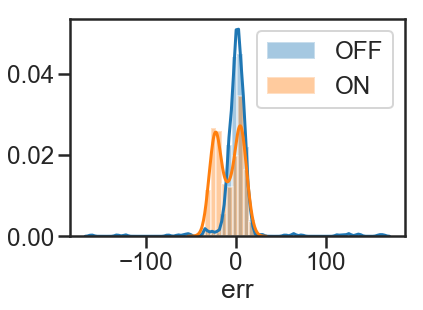

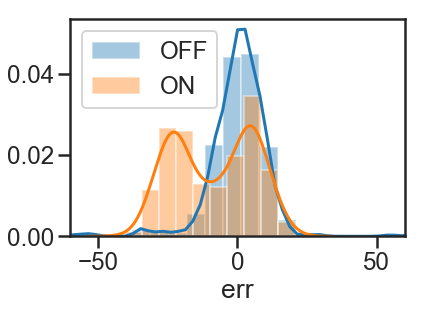

10.15928 13.773259999999999


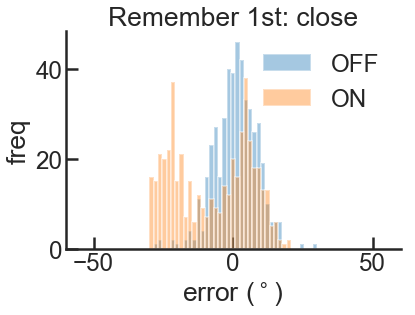

In [197]:
# err1_on_c = pd.read_excel('err1_on_c15.xlsx')
# err1_off_c = pd.read_excel('err1_off_c15.xlsx')

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.show()

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.xlim(-60,60)
plt.show()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())


err1_off_c_o = err1_off_c.loc[err1_off_c['abs_err']< outlier_lim] #err1_off_c['abs_err'].mean() + 2*err1_off_c['abs_err'].std()]
err1_on_c_o = err1_on_c.loc[err1_on_c['abs_err']< outlier_lim] #err1_on_c['abs_err'].mean() + 2*err1_on_c['abs_err'].std()]

sns.distplot(err1_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err1_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


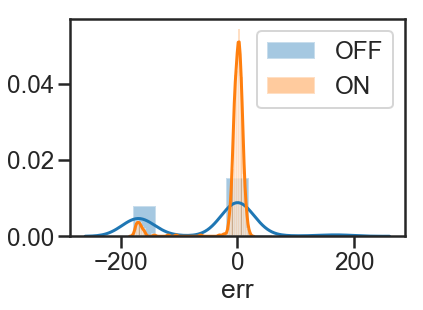

65.27506 15.24012


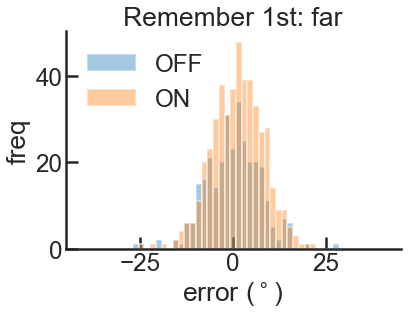

7.059310344827586 5.781531914893616


In [198]:
#err1_on_f = pd.concat( [pd.read_excel('err1_on_f13.xlsx'), pd.read_excel('err1_on_f12.xlsx')])
#err1_off_f = pd.concat( [pd.read_excel('err1_off_f13.xlsx'), pd.read_excel('err1_off_f12.xlsx')])

from scipy.stats import norm

# err1_on_f = pd.read_excel('err1_on_f15.xlsx')
# err1_off_f = pd.read_excel('err1_off_f15.xlsx')

sns.distplot(err1_off_f.err, label='OFF')
sns.distplot(err1_on_f.err, label='ON')
plt.legend()
plt.show()
print(err1_off_f.abs_err.mean(), err1_on_f.abs_err.mean())

err1_off_f_o = err1_off_f.loc[ err1_off_f['abs_err']< outlier_lim] #err1_off_f['abs_err'].mean() + 2*err1_off_f['abs_err'].std()]
err1_on_f_o = err1_on_f.loc[err1_on_f['abs_err']< outlier_lim ] #err1_on_f['abs_err'].mean() + 2*err1_on_f['abs_err'].std()]

sns.distplot(err1_off_f_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40) )
sns.distplot(err1_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40)  ) #, fit=norm, fit_kws={"color":"orange"}

plt.legend( frameon=False)
plt.xlim(-45,45)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
#plt.ylim(-0.01, 0.08)
plt.show()

print(err1_off_f_o.abs_err.mean(), err1_on_f_o.abs_err.mean())


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


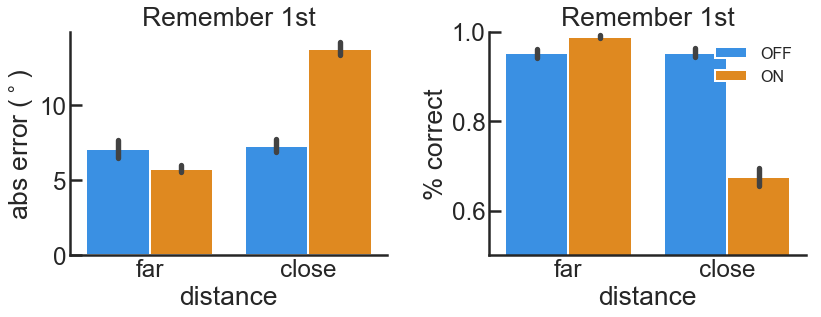

In [207]:
first = pd.concat([err1_on_c_o, err1_off_c_o,err1_on_f_o, err1_off_f_o ])
first['performance']=first['abs_err']<20

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=68, data=first, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 1st')
#ax1.set_ylim(2,6)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=68, data=first, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct')
#ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 1st')
ax2.set_ylim(0.5, 1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

## R2

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


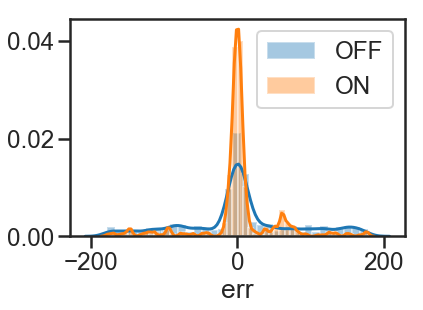

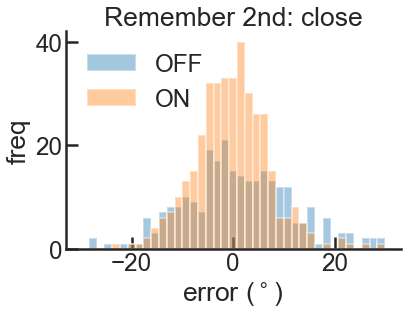

26.47414948453608 15.484934782608697


In [203]:
sns.distplot(err2_off_c.err, label='OFF')
sns.distplot(err2_on_c.err, label='ON')
plt.legend()
#plt.xlim(-30,30)
plt.show()
err2_on_c_o = err2_on_c.loc[err2_on_c['abs_err']< outlier_lim] # err2_on_c['abs_err'].mean()+ 2*err2_on_c['abs_err'].std()]
err2_off_c_o = err2_off_c.loc[err2_off_c['abs_err']< outlier_lim ]# err2_off_c['abs_err'].mean() + 2*err2_off_c['abs_err'].std()]

sns.distplot(err2_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err2_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
#plt.xlim(-30,30)
plt.title('Remember 2nd: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()


#print(err2_off_c.abs_err.mean(), err2_on_c.abs_err.mean())

print(err2_off_c_o.abs_err.mean(), err2_on_c_o.abs_err.mean())


##################################################################


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


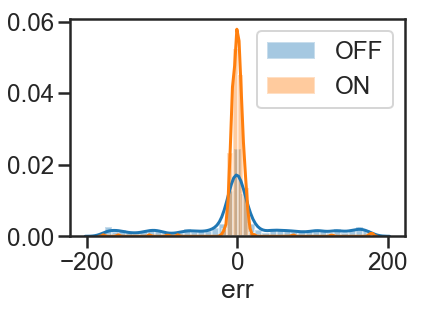

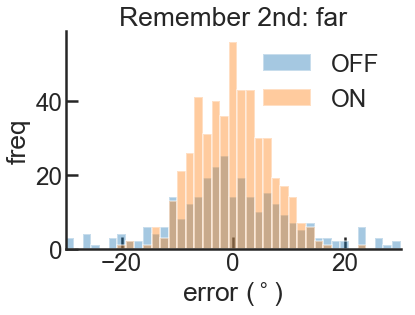

10.188481848184818 5.122346938775511


In [204]:
sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.show()

outlier_lim=45


err2_on_f_o = err2_on_f.loc[err2_on_f['abs_err']< outlier_lim]
err2_off_f_o = err2_off_f.loc[err2_off_f['abs_err']<outlier_lim]

sns.distplot(err2_off_f_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err2_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-30,30)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

print(err2_off_f_o.abs_err.mean(), err2_on_f_o.abs_err.mean())
##################################################################


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


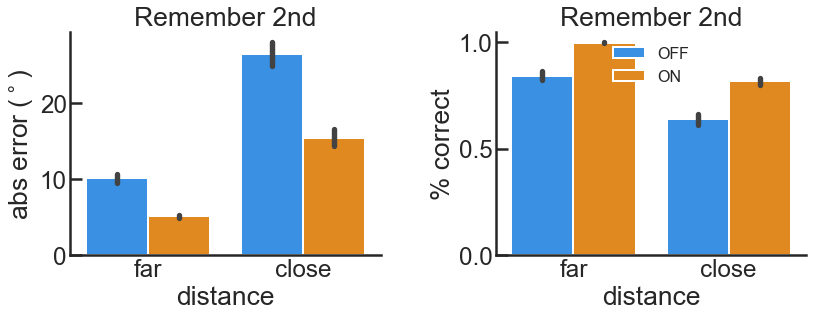

In [205]:
second = pd.concat([err2_on_c_o, err2_off_c_o,err2_on_f_o, err2_off_f_o ])
second['performance']=second['abs_err']<20

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 2nd')
#ax1.set_ylim(2,9)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct')
ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 2nd')
#ax2.set_ylim(0.7, 1.)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

## Phantom? 

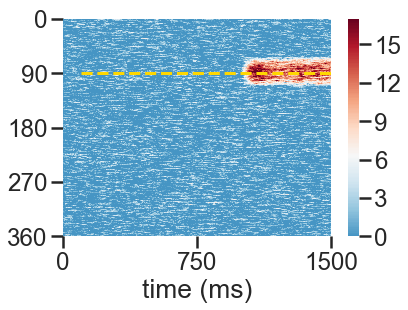

In [230]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=1500, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phnatom_duration=500)

hemap(on)

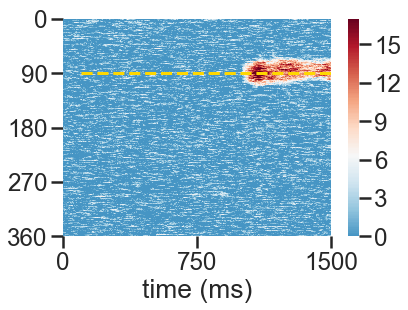

In [231]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=1500, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phnatom_duration=500)

hemap(on)

### Simulations phantom

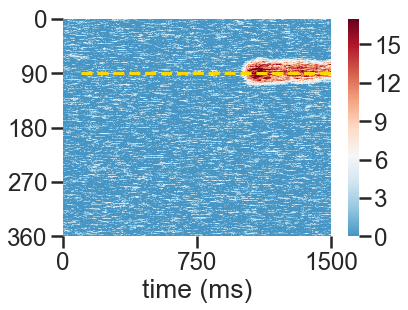

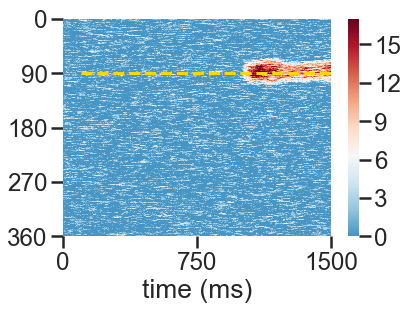

In [232]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=10
firing_phant_off=[]
RE_off_stim=[]
RE_off=[]
firing_all_off=[]

for g in range(n_sim_ph):
    on2= model(totalTime=1500, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100, phnatom_duration=600)
    hemap(on2)
    plt.show()
    mean_firing=on2[4][:, 50:400].mean()
    RE_off.append(on2[4][:, 50:500])
    RE_off_stim.append(on2[4][:, 500:])
    firing_phant_off.append(mean_firing)
    firing_all_off.append( on2[4].mean(axis=0) )

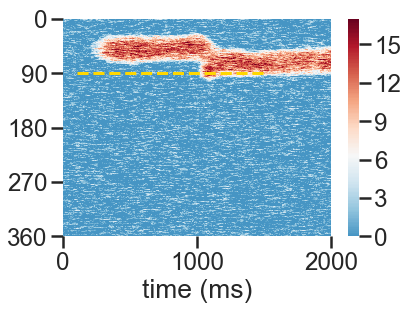

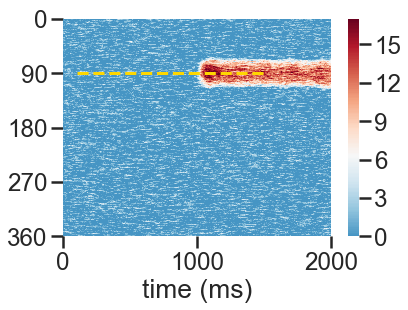

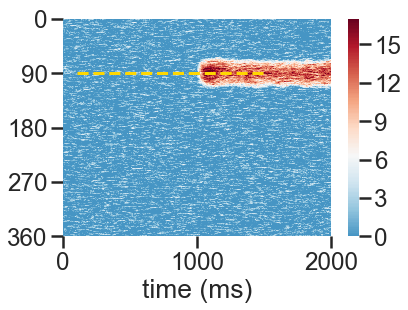

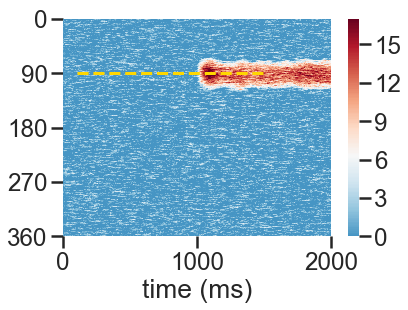

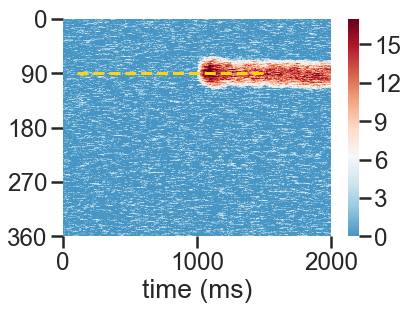

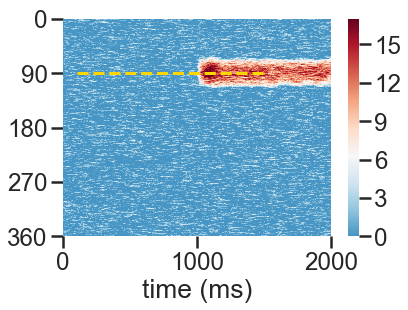

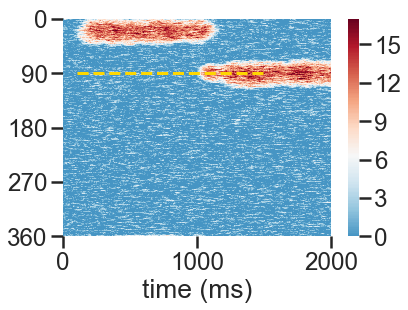

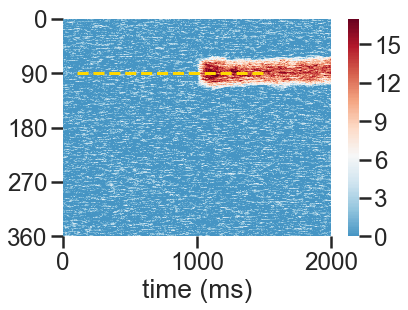

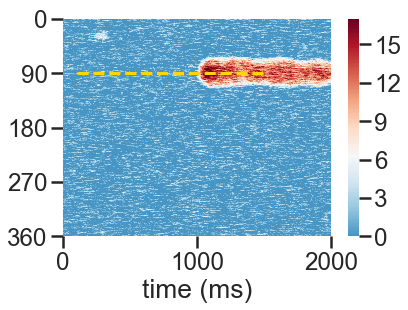

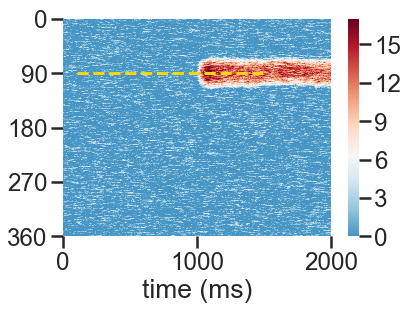

In [96]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=10
firing_phant_on=[]
firing_all_on =[]
RE_on=[]
RE_on_stim=[]

for g in range(n_sim_ph):
    on2= model(totalTime=1500, targ_onset_1=10000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5., k_noise=0.6,             
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100, phnatom_duration=600)
    hemap(on2)
    plt.show()
    RE_on.append(on2[4][:, 50:400])
    RE_on_stim.append(on2[4][:, 500:])
    mean_firing=on2[4][:, 50:500].mean()
    firing_phant_on.append(mean_firing)
    firing_all_on.append( on2[4].mean(axis=0) )

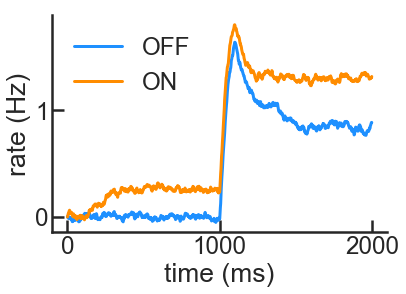

In [97]:
plt.plot(np.mean(firing_all_off, axis=0), label='OFF', color=c_off )
plt.plot(np.mean(firing_all_on, axis=0), label='ON', color=c_on )
plt.legend(frameon=False)
plt.title('')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0, 500, 1000])
plt.gca().set_xticklabels(['0', '1000', '2000'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('time (ms)');
#r'abs error ($^\circ$)'
#plt.ylim(-2,17);

In [103]:
ph_on=pd.DataFrame(firing_phant_on)
ph_on['stimulation']='ON'
ph_off=pd.DataFrame(firing_phant_off)
ph_off['stimulation']='OFF'

In [104]:
df_ph = pd.concat([ph_on, ph_off])
df_ph.columns=['mean_firing', 'stimulation']
df_ph['order']='2nd'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


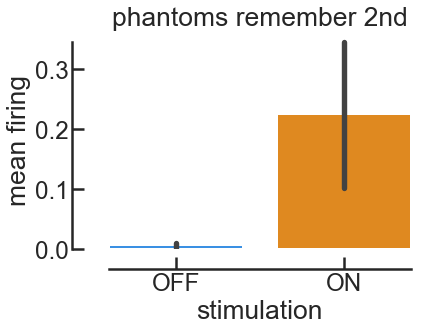

In [106]:
sns.barplot(x='stimulation', y='mean_firing', order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df_ph)
plt.ylabel(r'mean firing')
plt.title('phantoms remember 2nd')
#plt.ylim(-0.05,0.3)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


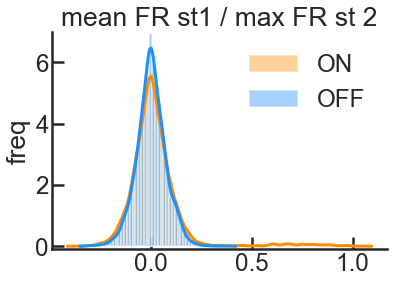

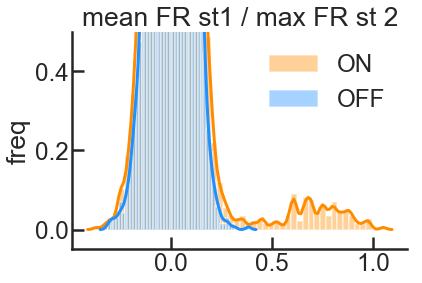

In [107]:
off=[] ## no stimulation

for i in range(len(RE_off)):
    off.append(RE_off[i].mean(axis=1) / RE_off_stim[i].max(axis=1)) #.max(axis=1)
    
    
off = list(itertools.chain.from_iterable(off))


on=[] ## stimulation

for i in range(len(RE_on)):
    on.append(RE_on[i].mean(axis=1) / RE_on_stim[i].max(axis=1)) #.max(axis=1)
    
    
on = list(itertools.chain.from_iterable(on))

sns.distplot(on, color=c_on, label='ON')
sns.distplot(off, color=c_off, label='OFF')
plt.ylim(-0.1, 7. )
plt.title('mean FR st1 / max FR st 2')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()


sns.distplot(on, color=c_on, label='ON')
sns.distplot(off, color=c_off, label='OFF')
plt.ylim(-0.05, 0.5 );
plt.title('mean FR st1 / max FR st 2')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()
#plt.xlim(-1000,1000)